# Chap9 线性回归大家族

# 1.概述

## 1.1 线性回归大家庭

最著名的就是我们的线性回归和逻辑回归，从他们衍生出了岭回归，Lasso，弹性网，除此之外，还有众多分类算法改进后的回归，比如回归树，随机森林的回归，支持向量回归，贝叶斯回归等等。除此之外，我们还有各种鲁棒的回归：比如RANSAC，Theil-Sen估计，胡贝尔回归等等。

## 1.2 sklearn中的线性回归

- linear_model.LinearRegression 使用普通最小二乘法的线性回归
- linear_model.Ridge 岭回归，一种将L2作为正则化工具的线性最小二乘回归
- linear_model.RidgeCV 带交叉验证的岭回归
- linear_model.Lasso Lasso，使用L1作为正则化工具来训练的线性回归模型
- linear_model.LassoCV 带交叉验证和正则化迭代路径的Lasso

# 2.多元线性回归LinearRegression

## 2.1 多元线性回归的基本原理

$$\hat{y}=X*w$$
最小化残差平方和$\min_w{||y-Xw||_2^2}$的，系数$w$的取值

## 2.2 最小二乘法求解多元线性回归的参数

求解让残差平方和RSS最小化的参数向量$w$，通过最小化真实值和预测值之间的RSS来求解参数的方法叫做最小二乘法
$$w=(X^TX)^{-1}X^Ty$$

## 2.3 linear_model.LinearRegression

*class `sklearn.linear_model.LinearRegression` (fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)*

没有一个参数是必填的，没有太多的参数可以调节。线性回归的效果多半是依赖数据本身，与模型的调参没什么关系。

- `fit_intercept `

  默认为True是否计算此模型的截距
- `normalize`
    默认为False.如果为True，则特征矩阵X在进入回归之前将会被减去均值（中心化）并除以L2范式（缩放）。如果你希望进行标准化，请在fit数据之前使用preprocessing模块中的标准化专用类StandardScaler
- `copy_X`
    默认为True.如果为真，将在X.copy()上进行操作，否则的话原本的特征矩阵X可能被线性回归影响并覆盖
- `n_jobs`
    默认为None.用于计算的作业数。只在多标签的回归和数据量足够大的时候才生效。如果输入 -1，则表示使用全部的CPU来进行计算。

**接口**
- `coef`_   返回w的系数向量
- `intercept_` 截距
  
  
**过程**
1. reg = LR() 实例化
2. LR().fit(Xtrain,Ytrain)
3. LR().predict(Xtest)

**其余知识**
- DataFrame的属性  feature_names 调用各个特征的名称
- train_test_split(X,y,test_size=0.3,random_state=420)
  - 划分训练集和测试集是乱序的，一定要恢复索引

1.导入数据和模块

In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
import pandas as pd

In [3]:
housevalue = fch() #会需要下载，大家可以提前运行试试看

X = pd.DataFrame(housevalue.data) #放入DataFrame中便于查看
y = housevalue.target
X.shape


(20640, 8)

In [7]:
housevalue

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
y.shape


(20640,)

In [9]:
print(y.min(),y.max())
# y 是连续性的

0.14999 5.00001


In [5]:
X.head()


,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
housevalue.feature_names


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
X.columns = housevalue.feature_names
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


2.划分测试集和训练集

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
Xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17073,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
16956,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
20012,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
13072,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
8457,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [14]:
# 恢复索引
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

Xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


4.建模

In [18]:
#————————————————————————————建立线性模型————————————————————————————

reg = LR(no).fit(Xtrain,Ytrain)
yhat = reg.fit(Xtrain,Ytrain)
yhat=reg.predict(Xtest)
yhat
print(yhat.min(),yhat.max())

# 预测范围应该在0-5之间
# 预测的不是很准....

-0.6528439725036108 7.1461982142708536


In [20]:
reg.coef_  # w的系数向量

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [21]:
reg.intercept_ # 截距

-36.25689322920381

In [22]:
[*zip(Xtrain.columns,reg.coef_)]


# 最重要的特征是 平均卧室数 最不重要的特征人口

[('MedInc', 0.43735893059684006),
 ('HouseAge', 0.010211268294493883),
 ('AveRooms', -0.10780721617317668),
 ('AveBedrms', 0.6264338275363759),
 ('Population', 5.216125353348089e-07),
 ('AveOccup', -0.003348509646333704),
 ('Latitude', -0.4130959378947717),
 ('Longitude', -0.4262109536208464)]

# 3.回归类的模型评估指标

1. 是否预测到了正确的数值
2. 是否拟合到了足够的信息


## 3.1 预测是否正确

均方误差MSE（mean squared error）来衡量我们的预测值和真实值的差异$MSE=\frac{1}{m}\sum{(y-y_i)^2}$

两种方式调用这个评估指标

1. 使用sklearn专用的模型评估模块metrics里的类mean_squared_error，
   -  `mean_absolute_error(Yhat,Ytest)`
2. 调用交叉验证的类cross_val_score并使用里面的scoring参数来设置使用均方误差。
   - `cross_val_score(reg,X,y,cv=10,scoring='neg_mean_squared_error')`


- 按序查看模型的评估指标 `sorted(sklearn.metrics.SCORERS.keys())`

In [25]:
from sklearn.metrics import mean_absolute_error as MSE

MSE(yhat,Ytest)

0.5307069814636164

In [26]:
Ytest.mean()   # 均值在2 均方误差在0.5  误差大概在20% 
# 一般可以接受的均方误差在5%

2.0819292877906976

In [29]:
#————————————————————————————查看模型评估指标————————————————————————————
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [27]:
cross_val_score(reg,X,y,cv=10,scoring='neg_mean_squared_error')

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

**负的均方误差**

sklearn中计算的是负的均方误差，符号表示的是损失。真正的均方误差只需要去掉符号

## 3.2 是否拟合足够的信息

为了衡量模型对数据上的信息量的捕捉，我们定义了$R^2$
分子是真实值和预测值之差的差值，也就是我们的模型没有捕获到的信息总量，分母是真实标签所带的信息量，所以其衡量的是1 - 我们的模型没有捕获到的信息量占真实标签中所带的信息量的比例，所以，$R^2$越接近1越好。

**调用方法**
1. 直接从metrics中导入r2_score，输入预测值和真实值后打分
    - `r2_score(Ytest,Yhat)`  真实值要写在预测值的前面
    - `r2_score(y_true = Ytest,y_pred = yhat)`
2. 线性回归LinearRegression的接口score来进行调用
    - LR().score(Xtest,Ytest)
3. 交叉验证中，输入"r2"来调用。
   - cross_val_score(reg,X,y,cv=10,scoring="r2").mean() 取10次交叉验证的均值 


In [30]:
#————————————————————————————法1————————————————————————————
from sklearn.metrics import r2_score

r2_score(yhat,Ytest)  # 输入的顺序不对

0.33806537615559895

In [31]:
#————————————————————————————法2————————————————————————————
r2 = reg.score(Xtest,Ytest)
r2

0.6043668160178816

**相同的评估指标不同的结果**

- 调用r2_score时，需要指定真实值和测试值
  - 利用shift tab 检测那个值在前面

In [32]:
#使用shift tab键来检查究竟哪个值先进行输入
r2_score(Ytest,yhat)


0.6043668160178816

In [33]:
#或者你也可以指定参数，就不必在意顺序了
r2_score(y_true = Ytest,y_pred = yhat)

0.6043668160178816

In [34]:
#————————————————————————————法3————————————————————————————
cross_val_score(reg,X,y,cv=10,scoring="r2").mean()

0.5110068610524554

数据集上的MSE其实不是一个很大的数（0.5），但我们的R2不高，这证明我们的模型比较好地拟合了一部分数据的数值，却没有能正确拟合数据的分布

In [35]:
import matplotlib.pyplot as plt
sorted(Ytest)   # 排序为了方便画图

[0.14999,
 0.14999,
 0.225,
 0.325,
 0.35,
 0.375,
 0.388,
 0.392,
 0.394,
 0.396,
 0.4,
 0.404,
 0.409,
 0.41,
 0.43,
 0.435,
 0.437,
 0.439,
 0.44,
 0.44,
 0.444,
 0.446,
 0.45,
 0.45,
 0.45,
 0.45,
 0.455,
 0.455,
 0.455,
 0.456,
 0.462,
 0.463,
 0.471,
 0.475,
 0.478,
 0.478,
 0.481,
 0.481,
 0.483,
 0.483,
 0.485,
 0.485,
 0.488,
 0.489,
 0.49,
 0.492,
 0.494,
 0.494,
 0.494,
 0.495,
 0.496,
 0.5,
 0.5,
 0.504,
 0.505,
 0.506,
 0.506,
 0.508,
 0.508,
 0.51,
 0.516,
 0.519,
 0.52,
 0.521,
 0.523,
 0.523,
 0.525,
 0.525,
 0.525,
 0.525,
 0.525,
 0.527,
 0.527,
 0.528,
 0.529,
 0.53,
 0.531,
 0.532,
 0.534,
 0.535,
 0.535,
 0.535,
 0.538,
 0.538,
 0.539,
 0.539,
 0.539,
 0.541,
 0.541,
 0.542,
 0.542,
 0.542,
 0.543,
 0.543,
 0.544,
 0.544,
 0.546,
 0.547,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.551,
 0.553,
 0.553,
 0.553,
 0.554,
 0.554,
 0.554,
 0.555,
 0.556,
 0.556,
 0.557,
 0.558,
 0.558,
 0.559,
 0.559,
 0.559,
 0.559,
 0.56,
 0.56,
 0.562,
 0.566,
 0.567,
 

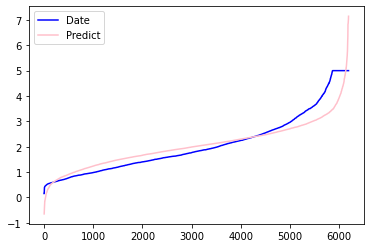

In [38]:
plt.plot(range(len(Ytest)),sorted(Ytest),c='blue',label='Date')
plt.plot(range(len(yhat)),sorted(yhat),c='pink',label='Predict')
plt.legend()
plt.show()

# 但是图像的开头和结尾处却又着较大的拟合误差

In [39]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)

cross_val_score(LR(), X, y, cv=5, scoring='r2')

# R2 为什么会出现负值？

array([-179.86577271,   -5.69860535,  -15.10281588,  -78.21750079,
        -70.19186257])

当我们的R2显示为负的时候，这证明我们的模型对我们的数据的拟合非常糟糕，模型完全不能使用

# 4 多重共线性：岭回归与Lasso
---
## 4.1 多重共线性

由于w的表达式$w=(X^TX)^{-1}X^Ty$，而逆矩阵存在的充分必要条件是特征矩阵不存在多重共线性
1. 逆必须存在即，$(X^TX)^{-1}$不能等于零
   - 逆矩阵存在的充分必要条件是：矩阵的行列式不能为0
2. 行列式不能为0，则矩阵必须满秩
3. 满秩，即特征之间不能存在多重共线性 
   
- **精确相关关系和高度相关关系**并称为"多重共线性
  - 线性回归就无法使用最小二乘法来进行求解，或者求解就会出现偏差。
  - 不能存在多重共线性，不代表不能存在相关性——机器学习不要求特征之间必须独立，必须不相关，只要不是高度相关或者精确相关就好


## 4.2 岭回归

- 不是为了提升模型表现，而是为了修复漏洞

### 4.2.1 岭回归解决多重共线性问题

岭回归在多元线性回归的损失函数上加上了正则项，表达为系数$w$的L2范式（即系数$w$的平方项）乘以正则化系数$\alpha$
$$\min_w{||Xw-y||_2^2+\alpha||w||_2^2}$$

$$w=(X^TX+\alpha*I)^{-1}X^Ty$$

正则化系数避免了”精确相关关系“带来的影响，至少最小二乘法在$\alpha$存在的情况下是一定可以使用了。对于存在”高度相关关系“的矩阵，我们也可以通过调大$\alpha$，来让 $(X^TX+\alpha*I)^{-1}$矩阵的行列式变大，从而让逆矩阵变小，以此控制参数向量$w$的偏移。当$\alpha$越大，模型越不容易受到共线性的影响

### 4.2.2 linear_model.Ridge

在sklearn中，岭回归由线性模型库中的Ridge类来调用：

*class `sklearn.linear_model.Ridge` (alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None,tol=0.001, solver=’auto’, random_state=None)*

- 核心参数:正则项的系数$\alpha$

如果一个数据集在岭回归中使用各种正则化参数取值下**模型表现没有明显上升**（比如出现持平或者下降），则说明数据**没有多重共线性**，顶多是特征之间有一些相关性。

**建模顺序**
- reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
- reg.score(Xtest,Ytest)


In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt


housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [42]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)


#数据集索引恢复
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [43]:
#————————————————————————————利用岭回归进行建模————————————————————————————
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

# 结果没什么提升 这个数据中可以没有共线性的问题

0.6043610352312279

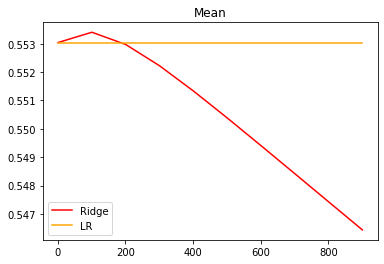

In [44]:
alpharange = np.arange(1,1001,100)
ridge, lr = [], []

for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring='r2').mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
    
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()


轻微的共线性，这种共线性被正则化参数$\alpha$消除后，模型的效果提升了一点点。在过了控制多重共线性的点后，模型的效果飞速下降，显然是正则化的程度太重，挤占了参数$w$本来的估计空间

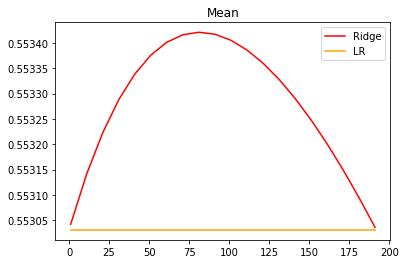

In [45]:
#细化一下学习曲线
alpharange = np.arange(1,201,10)

ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring='r2').mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
    
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

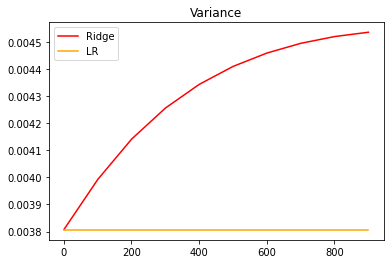

In [46]:
#模型方差如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []

for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
    
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

虽然岭回归和Lasso不是设计来提升模型表现，而是专注于解决多重共线性问题的，但当$\alpha$在一定范围内变动的时候，消除多重共线性也许能够一定程度上提高模型的泛化能
力。


下面换用波士顿数据集


c:\Users\HP\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

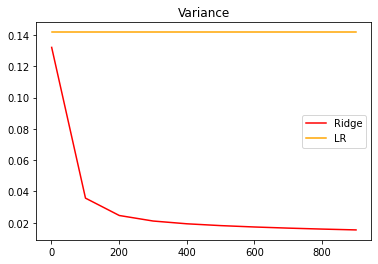

In [47]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

X = load_boston().data
y = load_boston().target
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)
#先查看方差的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []

for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
    
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()



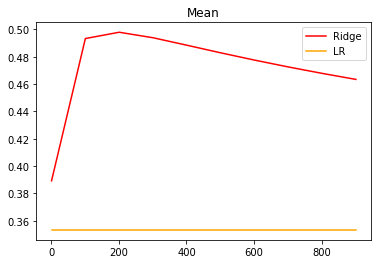

In [48]:
#查看R2的变化

alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

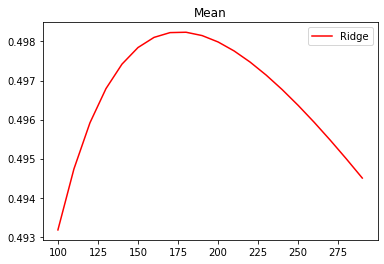

In [49]:
#细化学习曲线
alpharange = np.arange(100,300,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    #linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    #linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
#plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

对于波士顿房价数据集，数据集的方差降低明显，偏差也降低明显，可见使用岭回归还是起到了一定的作用，模型的泛化能力是有可能会上升的。

### 4.2.3 选取最佳的正则化参数取值

**岭迹图**
- 使用岭迹图来判断正则项参数的最佳取值
  - 目标是建立正则化参数与系数$w$之间的直接关系
- 岭迹图认为，线条交叉越多，则说明特征之间的多重共线性越高。
  - 系数较为平稳的喇叭口所对应的$\alpha$取值作为最佳的正则化参数的取值
- 不建议使用 ---> 评价非常的模糊


**交叉验证的岭回归**

应该使用交叉验证来选择最佳的正则化系数。在sklearn中，我们有带交叉验证的岭回归可以使用

*class `sklearn.linear_model.RidgeCV` (alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None,cv=None, gcv_mode=None, store_cv_values=False)*

RidgeCV的重要参数，属性和接口：

重要参数 | 含义
--- |---
alphas |需要测试的正则化参数的取值的元祖
scoring | 用来进行交叉验证的模型评估指标，默认是 ，可自行调整
store_cv_values |是否保存每次交叉验证的结果，默认False
cv |交叉验证的模式，默认是None，表示默认进行**留一交叉验证**，可以输入Kfold对象和StratifiedKFold对象来进行交叉验证。注意，仅仅当为None时，每次交叉验证的结果才可以被保存下来
**重要属性** |**含义**
alpha_ | 查看交叉验证选中的alpha
cv_values_ | 调用所有交叉验证的结果，只有当store_cv_values=True的时候才能够调用，因此返回的结构是(n_samples, n_alphas)
**重要接口**|  **含义**
score | 调用Ridge类不进行交叉验证的情况下返回的R平方

In [50]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [53]:
Ridge_ = RidgeCV(alphas=np.arange(1,100,10),
                #,scoring="neg_mean_squared_error"    #默认R2
                store_cv_values=True  
                #,cv=5   # 默认留一验证
                ).fit(X,y)

# 无关交叉验证的岭回归结果
Ridge_.score(X,y)

0.6060600528545175

In [54]:
#调用所有交叉验证的结果
Ridge_.cv_values_.shape   

(20640, 10)

In [55]:
#进行平均后可以查看每个正则化系数取值下的交叉验证结果
Ridge_.cv_values_.mean(axis=0)

array([0.52823795, 0.52816167, 0.52809619, 0.52804067, 0.52799435,
       0.52795653, 0.52792657, 0.52790389, 0.52788795, 0.52787827])

In [57]:
#查看被选择出来的最佳正则化系数
Ridge_.alpha_

91

## 4.3 Lasso
### 4.3.1 Lasso与多重共线性
除了岭回归之外，最常被人们提到还有模型Lasso。Lasso全称最小绝对收缩和选择算子.和岭回归一样，Lasso是被创造来作用于多重
共线性问题的算法，不过Lasso使用的是系数$w$的L1范式（L1范式则是系数 的绝对值）乘以正则化系数$\alpha$，所以Lasso的损失函数表达式为

$$\min_w{||Xw-y||_2^2+\alpha||w||_1}$$

$$w=(X^TX)^{-1}(X^Ty-\frac{\alpha*I}{2})$$

- Lasso不是从根本上解决多重共线性问题，而是限制多重共线性带来的影响

**岭回归 vs Lasso**

岭回归可以解决特征间的精确相关关系导致的最小二乘法无法使用的问题，而Lasso不行

**L1和L2正则化的核心差异**
两个正则化都会压缩系数$w$的大小，对标签贡献更少的特征的系数会更小，也会更容易被压缩。
- L2正则化只会将系数压缩到尽量接近0
- 但L1正则化主导稀疏性，因此会将系数压缩到0。

### 4.3.2 Lasso的核心作用：特征选择

*class `sklearn.linear_model.Lasso` (alpha=1.0, fit_intercept=True, normalize=False, precompute=False,copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)*


- 正则化系数$\alpha$。
- 参数positive。当这个参数为"True"的时候，是我们要求Lasso回归出的系数必须为正数

sklearn中我们的Lasso使用的损失函数是：

$$\min_w{\frac{1}{2n_{samples}}||Xw-y||_2^2+\alpha||w||_1}$$

In [58]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]


Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)
#恢复索引

for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

Xtrain.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [59]:
#————————————————————————————线性回归进行拟合————————————————————————————
reg = LinearRegression().fit(Xtrain,Ytrain)
(reg.coef_*100).tolist()

[43.735893059684,
 1.0211268294493883,
 -10.780721617317667,
 62.64338275363759,
 5.216125353348089e-05,
 -0.3348509646333704,
 -41.30959378947717,
 -42.62109536208464]

In [60]:
#————————————————————————————岭回归进行拟合————————————————————————————
Ridge_ = Ridge(alpha=0).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

# alpha=0时，岭回归和线性回归的系数相同

[43.73589305968408,
 1.0211268294494091,
 -10.780721617317727,
 62.64338275363801,
 5.2161253532684156e-05,
 -0.3348509646333581,
 -41.309593789477034,
 -42.6210953620846]

In [61]:
#————————————————————————————Lasso进行拟合————————————————————————————
lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

C:\Users\HP\AppData\Local\Temp\ipykernel_2712\2586254969.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
c:\Users\HP\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\HP\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.770e+03, tolerance: 1.917e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

[43.73589305968403,
 1.021126829449405,
 -10.780721617317669,
 62.6433827536378,
 5.2161253532672325e-05,
 -0.33485096463335784,
 -41.309593789477105,
 -42.62109536208469]

虽然依然对系数进行了计算，但是报出了整整三个红条

1. 正则化系数为0，这样算法不可收敛！如果你想让正则化系数为0，请使用线性回归吧
2. 没有正则项的坐标下降法可能会导致意外的结果，不鼓励这样做！
3. 目标函数没有收敛，你也许想要增加迭代次数，使用一个非常小的alpha来拟合模型可能会造成精确度问题

In [62]:
#————————————————————————————岭回归进行拟合 轻微调整alpha————————————————————————————
Ridge_ = Ridge(alpha=0.01).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()


[43.73575720621595,
 1.021129231812172,
 -10.780460336251652,
 62.64202320775688,
 5.217068073238944e-05,
 -0.33485065170676104,
 -41.30957143229181,
 -42.62105388932447]

In [63]:
#————————————————————————————Lasso进行拟合 轻微调整alpha————————————————————————————
lasso_ = Lasso(alpha=0.01).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

# Lasso对系数变化更加明显 可以用于特征选择

[40.10568371834486,
 1.093629260786014,
 -3.7423763610244514,
 26.52403783489719,
 0.0003525368511503932,
 -0.32071293948877994,
 -40.06483047344844,
 -40.81754399163315]

In [64]:
#加大正则项系数，观察模型的系数发生了什么变化
Ridge_ = Ridge(alpha=10**4).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()


# 岭回归 系数取得再大，也不会等于0，只会趋于零

[34.62081517607697,
 1.5196170869238699,
 0.3968610529210071,
 0.9151812510354975,
 0.0021739238012248438,
 -0.3476866014810103,
 -14.736963474215282,
 -13.435576102526936]

In [66]:
lasso_ = Lasso(alpha=10**2).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

# #看来10**2对于Lasso来说是一个过于大的取值
# lasso取的太大了，所有系数都压缩到了0

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

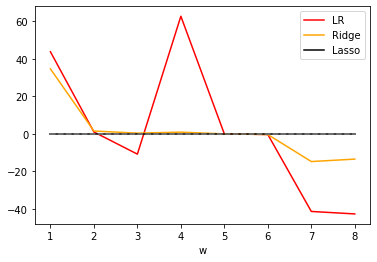

In [67]:
#将系数进行绘图
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")
plt.xlabel('w') #横坐标是每一个特征所对应的系数
plt.legend()
plt.show()

### 4.3.3 选取最佳的正则化参数取值

*class `sklearn.linear_model.LassoCV` (eps=0.001, n_alphas=100, alphas=None, fit_intercept=True,normalize=False, precompute=’auto’, max_iter=1000, tol=0.0001, copy_X=True, cv=’warn’, verbose=False,n_jobs=None, positive=False, random_state=None, selection=’cyclic’)*
`

参数| 含义
---|---
eps |正则化路径的长度，默认0.001
n_alphas| 正则化路径中 的个数，默认100
alphas | 需要测试的正则化参数的取值的元祖，默认None。当不输入的时候，自动使用eps和n_alphas来自动生成带入交叉验证的正则化参数
cv | 交叉验证的次数，默认3折交叉验证，将在0.22版本中改为5折交叉验证
**属性** |**含义**
alpha_ | 调用交叉验证选出来的最佳正则化参数
alphas_  | 使用正则化路径的长度和路径中 的个数来自动生成的，用来进行交叉验证的正则化参数
mse_path | 返回所以交叉验证的结果细节
coef_ | 调用最佳正则化参数下建立的模型的系数

In [71]:
from sklearn.linear_model import LassoCV

#自己建立Lasso进行alpha选择的范围
alpharange = np.logspace(-10, -2, 200,base=10)   # 其实是形成10为底的指数函数

alpharange[0:5]



array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10])

In [69]:
Xtrain.head()


,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [73]:
lasso_ = LassoCV(alphas=alpharange #自行输入的alpha的取值范围
                ,cv=5 #交叉验证的折数
                ).fit(Xtrain, Ytrain)

In [74]:
#查看被选择出来的最佳正则化系数
lasso_.alpha_

0.0020729217795953697

In [75]:
#调用所有交叉验证的结果
lasso_.mse_path_


array([[0.52454913, 0.49856261, 0.55984312, 0.50526576, 0.55262557],
       [0.52361933, 0.49748809, 0.55887637, 0.50429373, 0.55283734],
       [0.52281927, 0.49655113, 0.55803797, 0.5034594 , 0.55320522],
       [0.52213811, 0.49574741, 0.55731858, 0.50274517, 0.55367515],
       [0.52155715, 0.49505688, 0.55669995, 0.50213252, 0.55421553],
       [0.52106069, 0.49446226, 0.55616707, 0.50160604, 0.55480104],
       [0.5206358 , 0.49394903, 0.55570702, 0.50115266, 0.55541214],
       [0.52027135, 0.49350539, 0.55530895, 0.50076146, 0.55603333],
       [0.51995825, 0.49312085, 0.5549639 , 0.50042318, 0.55665306],
       [0.5196886 , 0.49278705, 0.55466406, 0.50013007, 0.55726225],
       [0.51945602, 0.49249647, 0.55440306, 0.49987554, 0.55785451],
       [0.51925489, 0.49224316, 0.55417527, 0.49965404, 0.55842496],
       [0.51908068, 0.49202169, 0.55397615, 0.49946088, 0.55897049],
       [0.51892938, 0.49182782, 0.55380162, 0.49929206, 0.55948886],
       [0.51879778, 0.49165759, 0.

In [76]:
lasso_.mse_path_.shape #返回每个alpha下的五折交叉验证结果


(200, 5)

In [77]:
lasso_.mse_path_.mean(axis=1) #有注意到在岭回归中我们的轴向是axis=0吗

array([0.52816924, 0.52742297, 0.5268146 , 0.52632488, 0.52593241,
       0.52561942, 0.52537133, 0.5251761 , 0.52502385, 0.52490641,
       0.52481712, 0.52475046, 0.52470198, 0.52466795, 0.52464541,
       0.52463188, 0.5246254 , 0.52462436, 0.52462744, 0.52463361,
       0.52464201, 0.52465199, 0.52466301, 0.52467466, 0.5246866 ,
       0.5246986 , 0.52471046, 0.52472203, 0.5247332 , 0.52474392,
       0.52475413, 0.52476379, 0.52477291, 0.52478147, 0.52478949,
       0.52479697, 0.52480393, 0.52481039, 0.52481639, 0.52482193,
       0.52482706, 0.52483179, 0.52483615, 0.52484016, 0.52484385,
       0.52484725, 0.52485036, 0.52485322, 0.52485584, 0.52485824,
       0.52486044, 0.52486246, 0.5248643 , 0.52486599, 0.52486753,
       0.52486895, 0.52487024, 0.52487141, 0.52487249, 0.52487348,
       0.52487437, 0.52487519, 0.52487594, 0.52487663, 0.52487725,
       0.52487782, 0.52487834, 0.52487882, 0.52487925, 0.52487965,
       0.52488001, 0.52488033, 0.52488063, 0.52488091, 0.52488

In [78]:
#最佳正则化系数下获得的模型的系数结果
lasso_.coef_


array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [79]:
lasso_.score(Xtest,Ytest)

0.6038982670571438

In [80]:
#与线性回归相比如何？
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

#使用lassoCV自带的正则化路径长度和路径中的alpha个数来自动建立alpha选择的范围
ls_ = LassoCV(eps=0.00001
                ,n_alphas=300
                ,cv=5
                ).fit(Xtrain, Ytrain)
ls_.alpha_


0.0020954551690628535

In [81]:
ls_.alphas_ #查看所有自动生成的alpha取值


array([2.94059737e+01, 2.82952253e+01, 2.72264331e+01, 2.61980122e+01,
       2.52084378e+01, 2.42562424e+01, 2.33400142e+01, 2.24583946e+01,
       2.16100763e+01, 2.07938014e+01, 2.00083596e+01, 1.92525862e+01,
       1.85253605e+01, 1.78256042e+01, 1.71522798e+01, 1.65043887e+01,
       1.58809704e+01, 1.52811004e+01, 1.47038891e+01, 1.41484809e+01,
       1.36140520e+01, 1.30998100e+01, 1.26049924e+01, 1.21288655e+01,
       1.16707233e+01, 1.12298864e+01, 1.08057012e+01, 1.03975388e+01,
       1.00047937e+01, 9.62688384e+00, 9.26324869e+00, 8.91334908e+00,
       8.57666619e+00, 8.25270079e+00, 7.94097249e+00, 7.64101907e+00,
       7.35239575e+00, 7.07467457e+00, 6.80744372e+00, 6.55030695e+00,
       6.30288297e+00, 6.06480491e+00, 5.83571975e+00, 5.61528779e+00,
       5.40318218e+00, 5.19908842e+00, 5.00270386e+00, 4.81373731e+00,
       4.63190858e+00, 4.45694804e+00, 4.28859627e+00, 4.12660362e+00,
       3.97072991e+00, 3.82074399e+00, 3.67642348e+00, 3.53755437e+00,
      

In [82]:
ls_.score(Xtest,Ytest)


0.6038915423819199

In [83]:
ls_.coef_

array([ 4.29785372e-01,  1.03639989e-02, -9.31060823e-02,  5.50940621e-01,
        1.15407943e-06, -3.31909776e-03, -4.10423420e-01, -4.22369926e-01])

# 5 非线性问题：多项式回归
---
## 5.1 “线性”概念

### 5.1.1 变量之间的线性关系

最常使用的线性是指“变量之间的线性关系（linearrelationship）”，它表示两个变量之间的关系可以展示为一条直线

### 5.1.2 数据的线性与非线性

当这些特征分别与标签存在线性关系的时候，我们就说这一组数据是线性数据。

### 5.1.3 线性模型与非线性模型

总结出线性模型的特点：其自变量都是一次项。

- random.uniform，从输入的任意两个整数中取出size个随机数

1.导入库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

2.创建数据

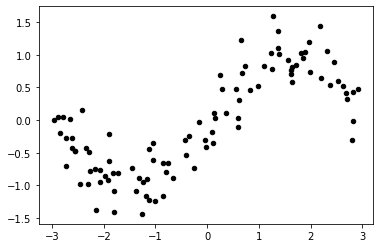

In [2]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) 
#random.uniform，从输入的任意两个整数中取出size个随机数

#生成y的思路：先使用NumPy中的函数生成一个sin函数图像，然后再人为添加噪音
y = np.sin(X) + rnd.normal(size=len(X)) / 3 #random.normal，生成size个服从正态分布的随机数


#使用散点图观察建立的数据集是什么样子
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()


In [3]:
#为后续建模做准备：sklearn只接受二维以上数组作为特征矩阵的输入
X.shape


(100,)

In [4]:
X = X.reshape(-1, 1)

3.使用原始数据进行建模

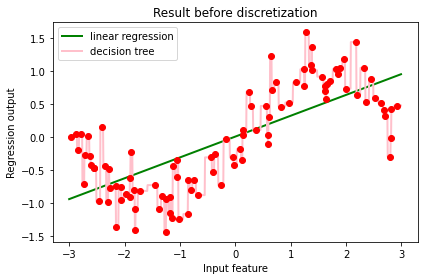

In [5]:
#使用原始数据进行建模
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)

#放置画布
fig, ax1 = plt.subplots(1)
#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='pink',label="decision tree")

#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='r')

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

plt.tight_layout()
plt.show()

- 线性回归无法拟合出这条带噪音的正弦曲线的真实面貌
- 决策树过拟合了，带入测试数据效果不好

线性模型可以用来拟合非线性数据，而非线性模型也可以用来拟合线性数据，更神奇的是，有的算法没有模型也可以处理各类数据，而有的模型可以既可以是线性，也可以是非线性模型.

为了让线性回归在类似的数据上变得更加强大，我们可以使用分箱，也就是离散化连续型变量的方法来处理原始数据

## 5.2 使用分箱处理非线性问题

- `sklearn.preprocessing.KBinsDiscretizer(n_bins=10,encode="onehot")`

4.分箱

- `sklearn.preprocessing.KBinsDiscretizer(n_bins=10,encode="onehot") `
  -  n_bins 分几类
  - encode 分类方法 
    - onehot 独热编码 返回一列稀疏矩阵
    - ordinal 返回一类

4.分箱

In [13]:
from sklearn.preprocessing import KBinsDiscretizer

# 将数据分箱
enc = KBinsDiscretizer(n_bins=10,encode='onehot')
X_binned = enc.fit_transform(X)


In [14]:
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [15]:
X.shape

(100, 1)

In [7]:
#使用pandas打开稀疏矩阵
import pandas as pd
pd.DataFrame(X_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#我们将使用分箱后的数据来训练模型，在sklearn中，测试集和训练集的结构必须保持一致，否则报错
LinearR_ = LinearRegression().fit(X_binned, y)


In [9]:
# =====此处英文测试数据和训练数据的形状不相同会报错=====
LinearR_.predict(line) #line作为测试集


# 测试数据和训练数据的形状必须相同 后续需要进行分箱

ValueError: X has 1 features, but LinearRegression is expecting 10 features as input.

In [ ]:

line.shape #测试

(1000, 1)

In [ ]:
#因此我们需要创建分箱后的测试集：按照已经建好的分箱模型将line分箱
line_binned = enc.transform(line)
line_binned.shape #分箱后的数据是无法进行绘图的


(1000, 10)

In [ ]:
line_binned


<1000x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [ ]:
LinearR_.predict(line_binned).shape

(1000,)

5.使用分箱数据进行建模和绘图

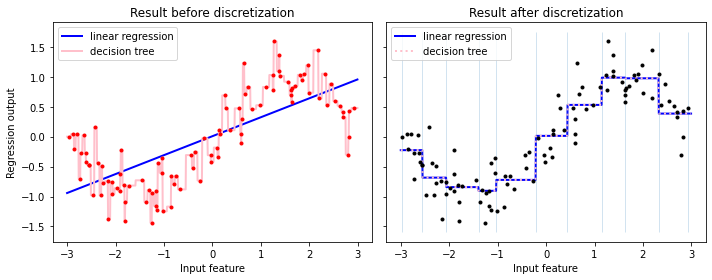

In [ ]:
#————————————————————————————合并上面的代码————————————————————————————
#准备数据
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

#将两张图像绘制在一起，布置画布
fig, (ax1, ax2) = plt.subplots(ncols=2
, sharey=True #让两张图共享y轴上的刻度
, figsize=(10, 4))


#在图1中布置在原始数据上建模的结果
ax1.plot(line, LinearR.predict(line), linewidth=2, color='blue',label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='pink',label="decision tree")

ax1.plot(X[:, 0], y, '.', c='r')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

#使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)


#进行预测，在图2中布置在分箱数据上进行预测的结果
ax2.plot(line #横坐标
        , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
        , linewidth=2
        , color='blue'
        , linestyle='-'
        , label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='pink',
linestyle=':', label='decision tree')

#绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] # x轴
            , *plt.gca().get_ylim() #y轴的上限和下限
            , linewidth=1
            , alpha=.2)
#将原始数据分布放置在图像上
ax2.plot(X[:, 0], y, '.', c='k')

#其他绘图设定
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

与分箱前的结果相比，线性回归明显变得更加灵活，而决策树的过拟合问题也得到了改善。但注意，一般来说我们是不使用分箱来改善决策树的过拟合问题的，因为树模型带有丰富而有效的剪枝功能来防止过拟合

6.箱子数如何影响模型的结果

0.9566086751329097


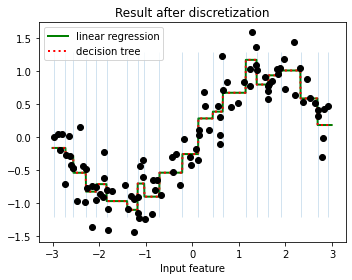

In [ ]:
#————————————————————————————分N箱————————————————————————————

enc = KBinsDiscretizer(n_bins=20,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

fig, ax2 = plt.subplots(1,figsize=(5,4))

LinearR_ = LinearRegression().fit(X_binned, y)
print(LinearR_.score(line_binned,np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

ax2.plot(line #横坐标
, LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
, linewidth=2
, color='green'
, linestyle='-'
, label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
linestyle=':', label='decision tree')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)

ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

# 分箱数过度容易过拟合

7.选取最优的箱数

- 绘制学习曲线 ---> 交叉验证

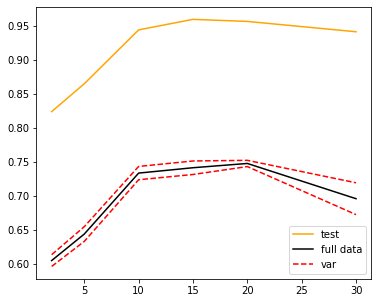

In [ ]:
from sklearn.model_selection import cross_val_score as CVS
import numpy as np
pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]

for i in binsrange:
    #实例化分箱类————————————————————
    enc = KBinsDiscretizer(n_bins=i,encode="onehot")
    #转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)

    #建立模型—————————————————————
    LinearR_ = LinearRegression()
    
    #全数据集上的交叉验证
    cvresult = CVS(LinearR_,X_binned,y,cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    #测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))
    #绘制图像
    
plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--",label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()

## 5.3 多项式回归PolynomialFeatures
### 5.3.1 多项式对数据做了什么

线性模型中的升维工具：多项式变化。这是一种通过增加自变量上的次数，而将数据映射到高维空间的方法，只要我们设定一个自变量上的次数（大于1），就可以相应地获得数据投影在高次方的空间中的结果。

*class `sklearn.preprocessing.PolynomialFeatures` (degree=2, interaction_only=False, include_bias=True)*
- `degree` 多项式中的次数，默认为2
- `interaction_only` 布尔值是否只产生交互项，默认为False
- `include_bias` 布尔值，是否产出与截距项相乘的 ，默认True

In [10]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#如果原始数据是一维的
X = np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [11]:
X.shape

(3, 1)

In [12]:
poly = PolynomialFeatures(degree=2)

# 调用transform
X_ = poly.fit_transform(X)

X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [14]:
X_.shape

# 数据升维

(3, 3)

In [15]:
PolynomialFeatures(degree=3).fit_transform(X)


array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

升n维就是$x^0,x^1,x^2,...,x^n$

In [16]:
# 不带截距项
PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)


array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [21]:
#为什么我们会希望不生成与截距相乘的x0呢？
#对于多项式回归来说，我们已经为线性回归准备好了x0，但是线性回归并不知道

xxx = PolynomialFeatures(degree=3).fit_transform(X)
xxx

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [19]:
rnd = np.random.RandomState(42) #设置随机数种子
y = rnd.randn(3)
y 


array([ 0.49671415, -0.1382643 ,  0.64768854])

In [20]:
LinearRegression().fit(xxx,y).coef_  #生成了多少个系数？


array([ 3.10168558e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [22]:
#查看截距
LinearRegression().fit(xxx,y).intercept_


1.2351711202036888

In [25]:
#发现问题了吗？线性回归并没有把多项式生成的x0当作是截距项
#所以我们可以选择：关闭多项式回归中的include_bias
#也可以选择：关闭线性回归中的fit_intercept


In [27]:
#生成了多少个系数？
LinearRegression(fit_intercept=False).fit(xxx,y).coef_

array([ 1.00596411,  0.06916756, -0.83619415,  0.25777663])

In [29]:
#查看截距
LinearRegression(fit_intercept=False).fit(xxx,y).intercept_

# 截距的部分 融合到上面的系数里

0.0

原始特征矩阵是二维的状况

In [30]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [31]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

上式相当于$x^0,x_1,x_2,x_1^2,x_2^2,x_1x_2$

当我们进行多项式转换的时候，**多项式会产出到最高次数为止的所有低高次项**。

- sklearn中存在着控制是否要生成平方和立方项的参数interaction_only，默认为False，以减少共线性。

In [32]:
PolynomialFeatures(degree=2).fit_transform(X)


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [33]:
PolynomialFeatures(degree=2,interaction_only=True).fit_transform(X)
#对比之下，当interaction_only为True的时候，只生成交互项

# 相对的降低了共线性

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [34]:
#更高维度的原始特征矩阵
X = np.arange(9).reshape(3, 3)
X


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [35]:
PolynomialFeatures(degree=2).fit_transform(X)


array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

In [37]:
PolynomialFeatures(degree=3).fit_transform(X)


array([[  1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,   8.],
       [  1.,   3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.,  27.,
         36.,  45.,  48.,  60.,  75.,  64.,  80., 100., 125.],
       [  1.,   6.,   7.,   8.,  36.,  42.,  48.,  49.,  56.,  64., 216.,
        252., 288., 294., 336., 384., 343., 392., 448., 512.]])

## 5.3.2 多项式回归处理非线性问题

之前我们说过，是希望通过这种将数据投影到高维的方式来帮助我们解决非线性问题

In [39]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np

In [42]:
rnd = np.random.RandomState(42)  # 设置随机种子
X = rnd.uniform(-3,3,size=100)
y = np.sin(X)+rnd.normal(size=len(X))/3

In [45]:
#将X升维，准备好放入sklearn中
X = X.reshape(-1,1)
X

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504],
       [-2.26777059],
       [-0.02893854],
       [-2.79366887],
       [ 2.45592241],
       [-1.44732011],
       [ 0

In [ ]:
#创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [ ]:
#创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [46]:
#————————————————————————————线性回归————————————————————————————
#原始特征矩阵的拟合结果
LinearR = LinearRegression().fit(X, y)
#对训练数据的拟合
LinearR.score(X,y)
#对测试数据的拟合
LinearR.score(line,np.sin(line))

0.6800102369793312

In [47]:
#————————————————————————————多项式回归————————————————————————————
d = 5
poly = PolynomialFeatures(degree=d)
X_ = poly.fit_transform(X)

line_ = PolynomialFeatures(degree=d).fit_transform(line)

#训练数据的拟合
LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_,y)

# 在训练数据上R2 显著提高


0.8561679370344799

In [48]:
#测试数据的拟合
LinearR_.score(line_,np.sin(line))

# 测试数据上的效果更好

0.9868904451787978

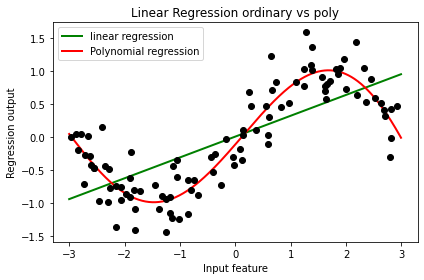

In [49]:
#————————————————————————————可视化————————————————————————————

import matplotlib.pyplot as plt
d=5
#和上面展示一致的建模流程
LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PF(degree=d).fit_transform(line)

#放置画布
fig, ax1 = plt.subplots(1)
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='red',label="Polynomial regression")
#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()


# 如何选择最佳的维度 ---> 交叉验证 

### 5.3.3 多项式回归的可解释性

- 重要接口get_feature_names() 调用各个特征的名字
  - 接口后面需要跟上括号

In [52]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.arange(9).reshape(3, 3)
X


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [53]:
poly = PolynomialFeatures(degree=5).fit(X)


In [51]:
#重要接口get_feature_names
poly.get_feature_names()

c:\Users\HP\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [54]:
#————————————————————————————使用加利福利亚房价数据————————————————————————————
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
housevalue.feature_names

X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [55]:
poly = PolynomialFeatures(degree=2).fit(X,y)
poly.get_feature_names(X.columns)  # 写上X的类名

c:\Users\HP\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [56]:
X_ = poly.transform(X)


In [57]:
#在这之后，我们依然可以直接建立模型，然后使用线性回归的coef_属性来查看什么特征对标签的影响最大
reg = LinearRegression().fit(X_,y)
coef = reg.coef_


In [58]:
[*zip(poly.get_feature_names(X.columns),reg.coef_)]


c:\Users\HP\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('1', 5.919540543535431e-08),
 ('住户收入中位数', -11.243025193047133),
 ('房屋使用年代中位数', -0.8488985429774577),
 ('平均房间数目', 6.441058979309905),
 ('平均卧室数目', -31.591328783950864),
 ('街区人口', 0.0004060903437363997),
 ('平均入住率', 1.0038623386910916),
 ('街区的纬度', 8.705681884553798),
 ('街区的经度', 5.880632723618107),
 ('住户收入中位数^2', -0.031308127167766604),
 ('住户收入中位数 房屋使用年代中位数', 0.0018599468180089292),
 ('住户收入中位数 平均房间数目', 0.04330204675617813),
 ('住户收入中位数 平均卧室数目', -0.18614227805444597),
 ('住户收入中位数 街区人口', 5.728315446833276e-05),
 ('住户收入中位数 平均入住率', -0.0025901950898045813),
 ('住户收入中位数 街区的纬度', -0.15250571255257905),
 ('住户收入中位数 街区的经度', -0.1442429393710074),
 ('房屋使用年代中位数^2', 0.00021172533628449324),
 ('房屋使用年代中位数 平均房间数目', -0.0012621900986623286),
 ('房屋使用年代中位数 平均卧室数目', 0.010611505610669234),
 ('房屋使用年代中位数 街区人口', 2.8188529325383913e-06),
 ('房屋使用年代中位数 平均入住率', -0.0018171694685867486),
 ('房屋使用年代中位数 街区的纬度', -0.01006903715603962),
 ('房屋使用年代中位数 街区的经度', -0.00999950167106151),
 ('平均房间数目^2', 0.007269477297201673),
 ('平均房间数目 平均卧

In [59]:
#放到dataframe中进行排序
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T


In [60]:
coeff.columns = ["feature","coef"]


In [61]:
coeff.sort_values(by="coef")

,feature,coef
4,平均卧室数目,-31.591329
1,住户收入中位数,-11.243025
2,房屋使用年代中位数,-0.848899
33,平均卧室数目 街区的纬度,-0.437043
34,平均卧室数目 街区的经度,-0.404151
12,住户收入中位数 平均卧室数目,-0.186142
15,住户收入中位数 街区的纬度,-0.152506
16,住户收入中位数 街区的经度,-0.144243
32,平均卧室数目 平均入住率,-0.087191
25,平均房间数目 平均卧室数目,-0.068906


In [62]:
#顺便可以查看一下多项式变化之后，模型的拟合效果如何了
poly = PolynomialFeatures(degree=4).fit(X,y)
X_ = poly.transform(X)


In [63]:
#————————————————————————————线性回归的拟合结果————————————————————————————
reg = LinearRegression().fit(X,y)
reg.score(X,y)


0.6062326851998052

In [64]:
from time import time

time0 = time()
reg_ = LinearRegression().fit(X_,y)
print("R2:{}".format(reg_.score(X_,y)))
print("time:{}".format(time()-time0))


R2:0.7448217469885605
time:1.686171293258667


In [65]:
#————————————————————————————利用随机森林拟合————————————————————————————
#假设使用其他模型？
from sklearn.ensemble import RandomForestRegressor as RFR

time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(X,y).score(X,y)))
print("time:{}".format(time()-time0))

R2:0.9740048849026242
time:20.696861267089844


随机森林的效果好，但是速度很慢

### 5.3.4 线性还是非线性模型？


**狭义线性模型 vs 广义线性模型**
狭义线性模型：自变量上不能有高此项，自变量与标签之间不能存在非线性关系。广义线性模型：只要标签与模型拟合出的参数之间的关系是线性的，模型就是线性的。这是说，只要生成的一系列之间没有相乘或者相除的关系，我们就认为模型是线性的。

多项式回归通常被认为是非线性模型，但广义上它是一种特殊的线性模型，它能够帮助我们处理非线性数
据，是线性回归的一种进化